In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **aaaaaaaaaaaaaaaaaaaaaaaaaaaa**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error

from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa/SriLanka_Weather_Dataset_updated (1).csv'

# Load the dataset
data_set = pd.read_csv(data_path)

# Columns to drop
need_drop = ["temperature_2m_max","temperature_2m_min", "sunrise", "sunset", "apparent_temperature_min",
             "apparent_temperature_mean", "shortwave_radiation_sum", "rain_sum",
             "apparent_temperature_max","snowfall_sum","country","weathercode"]
data_set.drop(columns=need_drop, inplace=True)

# Convert date column to datetime data type
data_set['time'] = pd.to_datetime(data_set['time'])

# Choose a city
city_name = "Jaffna"
data = data_set[data_set["city"] == city_name].drop('city', axis=1)

# Set data index as datetime column
data.index = pd.to_datetime(data['time'])
data = data.drop('time', axis=1)

# Fill missing values
data = data.fillna(method='ffill')

# Select the target columns
target_cols = ['temperature_2m_mean', 'precipitation_sum', 'precipitation_hours', 'et0_fao_evapotranspiration']

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Define sequence length and features
sequence_length = 10  # Number of time steps in each sequence
num_features = len(data.columns)
num_targets = len(target_cols)

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i+sequence_length]
    label = scaled_data[i+sequence_length][:num_targets]
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_size = int(0.8 * len(sequences))
train_x, test_x = sequences[:train_size], sequences[train_size:]
train_y, test_y = labels[:train_size], labels[train_size:]

print("Train X shape:", train_x.shape)
print("Train Y shape:", train_y.shape)
print("Test X shape:", test_x.shape)
print("Test Y shape:", test_y.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train X shape: (3924, 10, 10)
Train Y shape: (3924, 4)
Test X shape: (982, 10, 10)
Test Y shape: (982, 4)


<ipython-input-27-18a3ac0d4462>:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_27 (LSTM)                       │ (None, 10, 128)             │          71,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_28 (LSTM)                       │ (None, 10, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_29 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,124 (520.02 KB)

 Trainable params: 133,124 (520.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - loss: 0.0689 - val_loss: 0.0202
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0288 - val_loss: 0.0186
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0257 - val_loss: 0.0172
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0250 - val_loss: 0.0175
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0242 - val_loss: 0.0160
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0240 - val_loss: 0.0157
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0222 - val_loss: 0.0157
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0210 - val_loss: 0.0149
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0196 - val_loss: 0.0171
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0209 - val_loss: 0.0153
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0180 - val_loss: 0.0131
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step

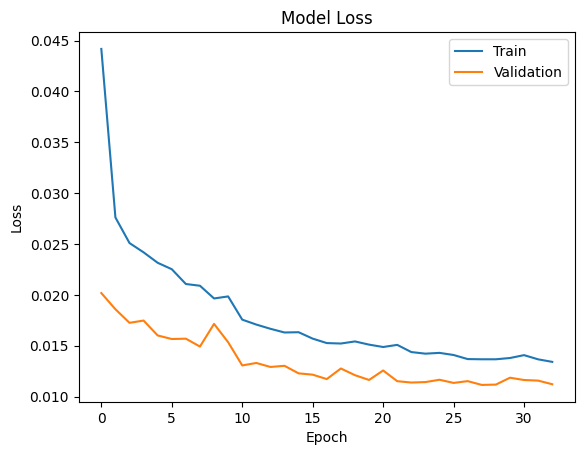

In [ ]:
# Create the LSTM model
model = Sequential()

# Add LSTM layers with dropout
model.add(LSTM(units=128, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))

# Add a dense output layer with multiple outputs
model.add(Dense(units=num_targets))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_x, train_y,
    epochs=100,
    batch_size=64,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
test_loss = model.evaluate(test_x, test_y)
print("Test Loss:", test_loss)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step

Metrics for temperature_2m_mean:
Mean Absolute Error (MAE): 0.046915062103436746
Mean Squared Error (MSE): 0.0036714010247683635
Root Mean Squared Error (RMSE): 0.06059208714649433

Metrics for precipitation_sum:
Mean Absolute Error (MAE): 0.02268798570229523
Mean Squared Error (MSE): 0.002982878038630842
Root Mean Squared Error (RMSE): 0.054615730688427504

Metrics for precipitation_hours:
Mean Absolute Error (MAE): 0.16157110708526057
Mean Squared Error (MSE): 0.04942417702194332
Root Mean Squared Error (RMSE): 0.2223154898380752

Metrics for et0_fao_evapotranspiration:
Mean Absolute Error (MAE): 0.07807831832115336
Mean Squared Error (MSE): 0.010460046651346526
Root Mean Squared Error (RMSE): 0.10227436947420662


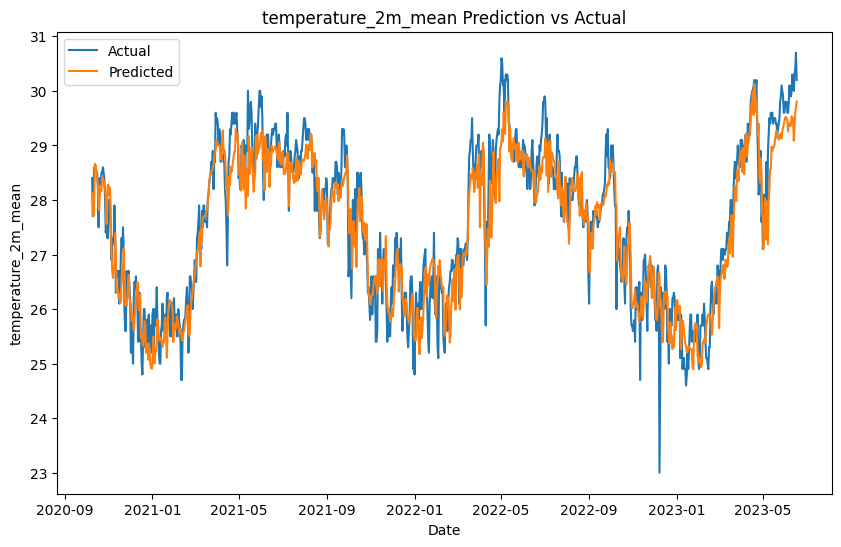

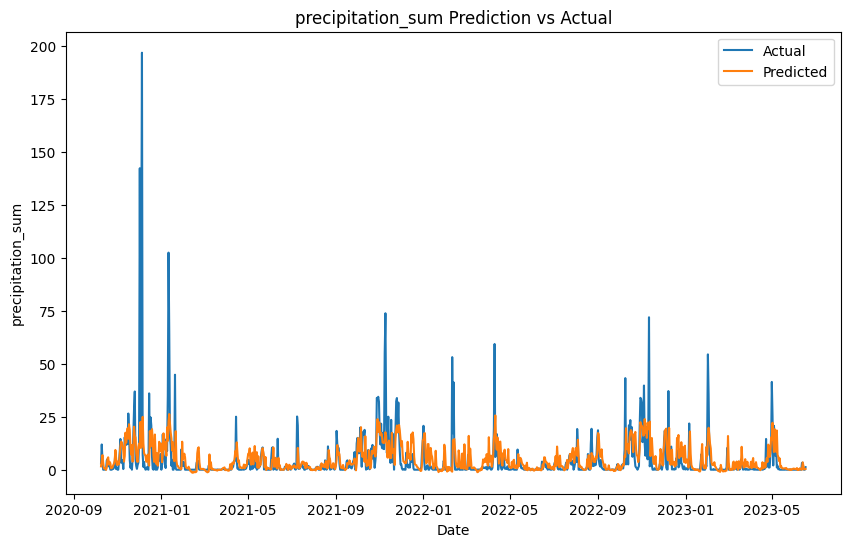

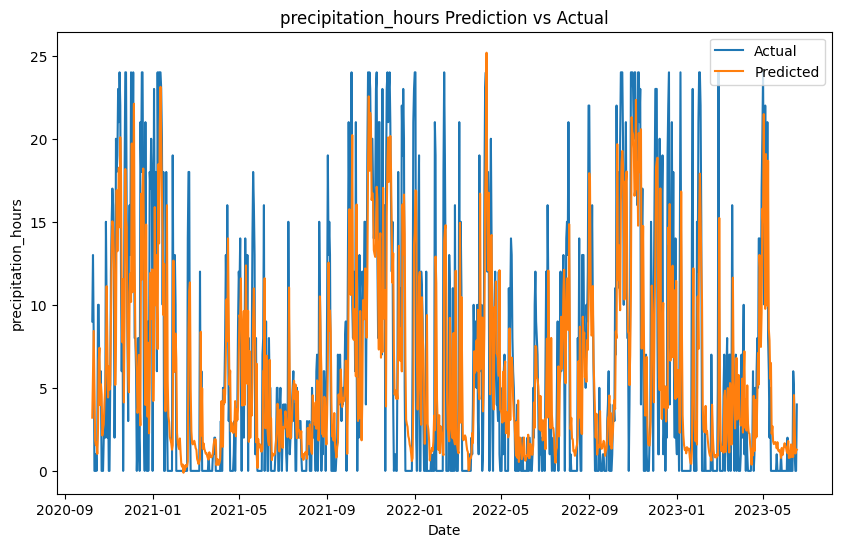

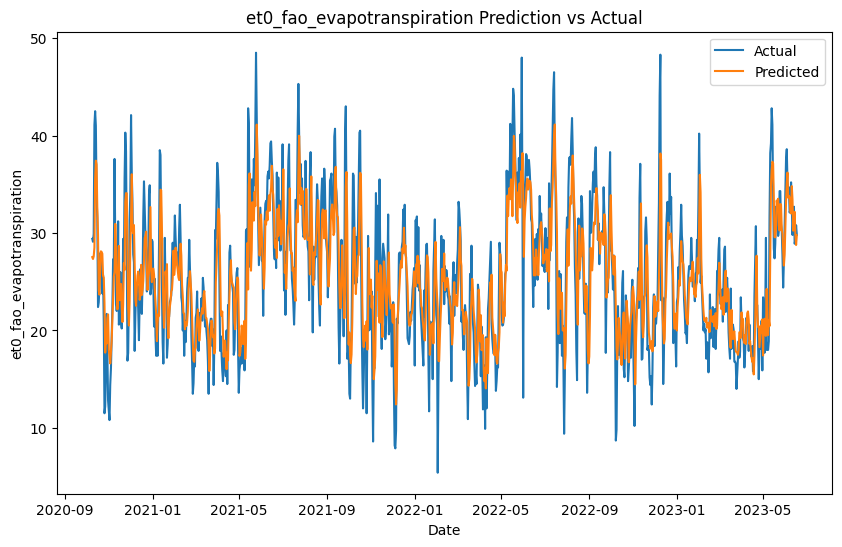

In [ ]:
# Predict temperatures using the trained model
predictions = model.predict(test_x)

# Calculate evaluation metrics for each target variable
for i, col in enumerate(target_cols):
    mae = mean_absolute_error(test_y[:, i], predictions[:, i])
    mse = mean_squared_error(test_y[:, i], predictions[:, i])
    rmse = np.sqrt(mse)
    print(f"\nMetrics for {col}:")
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)

# Plot actual vs predicted values for each target variable
for i, col in enumerate(target_cols):
    test_y_copies = np.repeat(test_y[:, i].reshape(-1, 1), test_x.shape[-1], axis=-1)
    true_values = scaler.inverse_transform(test_y_copies)[:, i]

    prediction_copies = np.repeat(predictions[:, i].reshape(-1, 1), test_x.shape[-1], axis=-1)
    predicted_values = scaler.inverse_transform(prediction_copies)[:, i]

    plt.figure(figsize=(10, 6))
    plt.plot(data.index[-len(true_values):], true_values, label='Actual')
    plt.plot(data.index[-len(predicted_values):], predicted_values, label='Predicted')
    plt.title(f'{col} Prediction vs Actual')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.legend()
    plt.show()
